## Preprocessing

In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])

In [21]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [22]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [23]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [24]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [25]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [26]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts < 100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64

In [27]:
# Convert categorical data to numeric with `pd.get_dummies`
# Include all object type or categorical columns that may have been missed initially
categorical_cols = application_df.select_dtypes(include=['object']).columns.tolist()
application_df = pd.get_dummies(application_df, columns=categorical_cols, drop_first=True, dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [29]:
# Apply Feature Selection (Remove Least Important Features)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Use the column names from the original DataFrame
feature_importance = pd.DataFrame({'Feature': application_df.drop(columns=["IS_SUCCESSFUL"]).columns, 'Importance': rf.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
low_importance_features = feature_importance[feature_importance['Importance'] < 0.01]['Feature'].tolist()

# Drop low-importance features from the original DataFrame
X_train = pd.DataFrame(X_train, columns=application_df.drop(columns=["IS_SUCCESSFUL"]).columns).drop(columns=low_importance_features).values
X_test = pd.DataFrame(X_test, columns=application_df.drop(columns=["IS_SUCCESSFUL"]).columns).drop(columns=low_importance_features).values

# Apply PCA for Dimensionality Reduction (Fixed to avoid errors)
n_components = min(X_train.shape[1], 15)  # Ensures PCA does not exceed available features
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)


## Compile, Train and Evaluate the Model

In [30]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(Dense(256, activation='swish', input_dim=X_train_scaled.shape[1]))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

# Second hidden layer
nn.add(Dense(128, activation='swish'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

# Third hidden layer
nn.add(Dense(64, activation='swish'))
nn.add(BatchNormalization())

# Output layer
nn.add(Dense(1, activation='sigmoid'))

# Check model structure
nn.summary()

c:\Users\olive\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,105 (184.00 KB)

 Trainable params: 46,209 (180.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [31]:
# Compile the model
nn.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Create a ModelCheckpoint callback to save weights (adjust frequency as needed) ###
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("weights_epoch_{epoch:02d}.h5", save_freq='epoch', verbose=1)

# Implement Callbacks for Optimization
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("optimized_weights.h5", monitor='val_loss', save_best_only=True, verbose=1)

In [32]:
# Train the Neural Network with More Epochs
history = nn.fit(
    X_train_scaled, y_train,
    epochs=100,  # Increased epochs for better convergence
    batch_size=16,  # Adjusted batch size for better gradient updates
    validation_data=(X_test_scaled, y_test),
    callbacks=[lr_reducer, early_stopper, checkpoint]
)

Epoch 1/100
1590/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.6483
Epoch 1: val_loss improved from inf to 0.57579, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6760 - loss: 0.6480 - val_accuracy: 0.7199 - val_loss: 0.5758 - learning_rate: 5.0000e-04
Epoch 2/100
1597/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7104 - loss: 0.5929
Epoch 2: val_loss improved from 0.57579 to 0.57188, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7104 - loss: 0.5929 - val_accuracy: 0.7214 - val_loss: 0.5719 - learning_rate: 5.0000e-04
Epoch 3/100
1604/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7124 - loss: 0.5867
Epoch 3: val_loss improved from 0.57188 to 0.57023, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7124 - loss: 0.5867 - val_accuracy: 0.7208 - val_loss: 0.5702 - learning_rate: 5.0000e-04
Epoch 4/100
1587/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7173 - loss: 0.5819
Epoch 4: val_loss improved from 0.57023 to 0.56959, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7173 - loss: 0.5819 - val_accuracy: 0.7202 - val_loss: 0.5696 - learning_rate: 5.0000e-04
Epoch 5/100
1603/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7138 - loss: 0.5811
Epoch 5: val_loss improved from 0.56959 to 0.56776, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7138 - loss: 0.5811 - val_accuracy: 0.7213 - val_loss: 0.5678 - learning_rate: 5.0000e-04
Epoch 6/100
1592/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7208 - loss: 0.5781
Epoch 6: val_loss did not improve from 0.56776
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7208 - loss: 0.5780 - val_accuracy: 0.7201 - val_loss: 0.5694 - learning_rate: 5.0000e-04
Epoch 7/100
1594/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7214 - loss: 0.5764
Epoch 7: val_loss improved from 0.56776 to 0.56774, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7214 - loss: 0.5765 - val_accuracy: 0.7197 - val_loss: 0.5677 - learning_rate: 5.0000e-04
Epoch 8/100
1591/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7177 - loss: 0.5782
Epoch 8: val_loss improved from 0.56774 to 0.56584, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7177 - loss: 0.5782 - val_accuracy: 0.7213 - val_loss: 0.5658 - learning_rate: 5.0000e-04
Epoch 9/100
1592/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7205 - loss: 0.5695
Epoch 9: val_loss did not improve from 0.56584
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7204 - loss: 0.5695 - val_accuracy: 0.7222 - val_loss: 0.5672 - learning_rate: 5.0000e-04
Epoch 10/100
1595/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7159 - loss: 0.5773
Epoch 10: val_loss improved from 0.56584 to 0.56524, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7159 - loss: 0.5772 - val_accuracy: 0.7206 - val_loss: 0.5652 - learning_rate: 5.0000e-04
Epoch 11/100
1583/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7153 - loss: 0.5786
Epoch 11: val_loss improved from 0.56524 to 0.56486, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7154 - loss: 0.5785 - val_accuracy: 0.7217 - val_loss: 0.5649 - learning_rate: 5.0000e-04
Epoch 12/100
1606/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7225 - loss: 0.5708
Epoch 12: val_loss did not improve from 0.56486
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7225 - loss: 0.5708 - val_accuracy: 0.7216 - val_loss: 0.5662 - learning_rate: 5.0000e-04
Epoch 13/100
1602/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7222 - loss: 0.5726
Epoch 13: val_loss did not improve from 0.56486
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7222 - loss: 0.5726 - val_accuracy: 0.7210 - val_loss: 0.5662 - learning_rate: 5.0000e-04
Epoch 14/100
1606/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7218 - loss: 0.5743
Epoch 14: val_loss improved from 0.56486 to 0.56466, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7218 - loss: 0.5743 - val_accuracy: 0.7226 - val_loss: 0.5647 - learning_rate: 5.0000e-04
Epoch 15/100
1596/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7210 - loss: 0.5718
Epoch 15: val_loss did not improve from 0.56466
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7210 - loss: 0.5718 - val_accuracy: 0.7216 - val_loss: 0.5651 - learning_rate: 5.0000e-04
Epoch 16/100
1584/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7251 - loss: 0.5667
Epoch 16: val_loss did not improve from 0.56466
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7250 - loss: 0.5668 - val_accuracy: 0.7212 - val_loss: 0.5653 - learning_rate: 5.0000e-04
Epoch 17/100
1583/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.5747
Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 17: val_loss did not improve from 0.56466
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7212 - los

1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7212 - loss: 0.5730 - val_accuracy: 0.7215 - val_loss: 0.5643 - learning_rate: 2.5000e-04
Epoch 19/100
1593/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7240 - loss: 0.5699
Epoch 19: val_loss did not improve from 0.56428
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7240 - loss: 0.5699 - val_accuracy: 0.7223 - val_loss: 0.5645 - learning_rate: 2.5000e-04
Epoch 20/100
1596/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7217 - loss: 0.5720
Epoch 20: val_loss improved from 0.56428 to 0.56325, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7217 - loss: 0.5720 - val_accuracy: 0.7224 - val_loss: 0.5632 - learning_rate: 2.5000e-04
Epoch 21/100
1606/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7228 - loss: 0.5678
Epoch 21: val_loss improved from 0.56325 to 0.56254, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7228 - loss: 0.5678 - val_accuracy: 0.7224 - val_loss: 0.5625 - learning_rate: 2.5000e-04
Epoch 22/100
1586/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7243 - loss: 0.5670
Epoch 22: val_loss did not improve from 0.56254
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7242 - loss: 0.5670 - val_accuracy: 0.7228 - val_loss: 0.5636 - learning_rate: 2.5000e-04
Epoch 23/100
1592/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7255 - loss: 0.5677
Epoch 23: val_loss improved from 0.56254 to 0.56161, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7255 - loss: 0.5677 - val_accuracy: 0.7229 - val_loss: 0.5616 - learning_rate: 2.5000e-04
Epoch 24/100
1606/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7174 - loss: 0.5750
Epoch 24: val_loss did not improve from 0.56161
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7174 - loss: 0.5750 - val_accuracy: 0.7227 - val_loss: 0.5628 - learning_rate: 2.5000e-04
Epoch 25/100
1586/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7316 - loss: 0.5650
Epoch 25: val_loss did not improve from 0.56161
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7315 - loss: 0.5650 - val_accuracy: 0.7222 - val_loss: 0.5616 - learning_rate: 2.5000e-04
Epoch 26/100
1597/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7244 - loss: 0.5697
Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 26: val_loss did not improve from 0.56161
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7244 - los

1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7283 - loss: 0.5648 - val_accuracy: 0.7226 - val_loss: 0.5612 - learning_rate: 1.2500e-04
Epoch 29/100
1604/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7213 - loss: 0.5745
Epoch 29: val_loss improved from 0.56115 to 0.56083, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7213 - loss: 0.5745 - val_accuracy: 0.7229 - val_loss: 0.5608 - learning_rate: 1.2500e-04
Epoch 30/100
1592/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7227 - loss: 0.5690
Epoch 30: val_loss did not improve from 0.56083
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7227 - loss: 0.5690 - val_accuracy: 0.7228 - val_loss: 0.5615 - learning_rate: 1.2500e-04
Epoch 31/100
1606/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7291 - loss: 0.5659
Epoch 31: val_loss did not improve from 0.56083
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7291 - loss: 0.5659 - val_accuracy: 0.7234 - val_loss: 0.5611 - learning_rate: 1.2500e-04
Epoch 32/100
1597/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.5676
Epoch 32: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 32: val_loss did not improve from 0.56083
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7277 - loss

1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7268 - loss: 0.5627 - val_accuracy: 0.7231 - val_loss: 0.5608 - learning_rate: 6.2500e-05
Epoch 35/100
1580/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7240 - loss: 0.5686
Epoch 35: val_loss improved from 0.56075 to 0.56059, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7240 - loss: 0.5686 - val_accuracy: 0.7228 - val_loss: 0.5606 - learning_rate: 6.2500e-05
Epoch 36/100
1589/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7297 - loss: 0.5658
Epoch 36: val_loss improved from 0.56059 to 0.56002, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7297 - loss: 0.5658 - val_accuracy: 0.7231 - val_loss: 0.5600 - learning_rate: 6.2500e-05
Epoch 37/100
1594/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7289 - loss: 0.5637
Epoch 37: val_loss did not improve from 0.56002
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7289 - loss: 0.5638 - val_accuracy: 0.7230 - val_loss: 0.5607 - learning_rate: 6.2500e-05
Epoch 38/100
1597/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.5651
Epoch 38: val_loss did not improve from 0.56002
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7277 - loss: 0.5652 - val_accuracy: 0.7237 - val_loss: 0.5607 - learning_rate: 6.2500e-05
Epoch 39/100
1594/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7273 - loss: 0.5661
Epoch 39: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 39: val_loss did not improve from 0.56002
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7273 - los

In [33]:
# Evaluate Optimized Model
final_loss, final_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Optimized Model -> Loss: {final_loss}, Accuracy: {final_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7231 - loss: 0.5600
Optimized Model -> Loss: 0.5600204467773438, Accuracy: 0.7231487035751343


In [34]:
# Test an Alternative Model: Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Train Gradient Boosting Model
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)

# Make Predictions
gbc_predictions = gbc.predict(X_test_scaled)

# Evaluate Gradient Boosting Model Accuracy
gbc_accuracy = accuracy_score(y_test, gbc_predictions)
print(f"Gradient Boosting Model Accuracy: {gbc_accuracy}")


Gradient Boosting Model Accuracy: 0.725597667638484


In [35]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimized.h5")

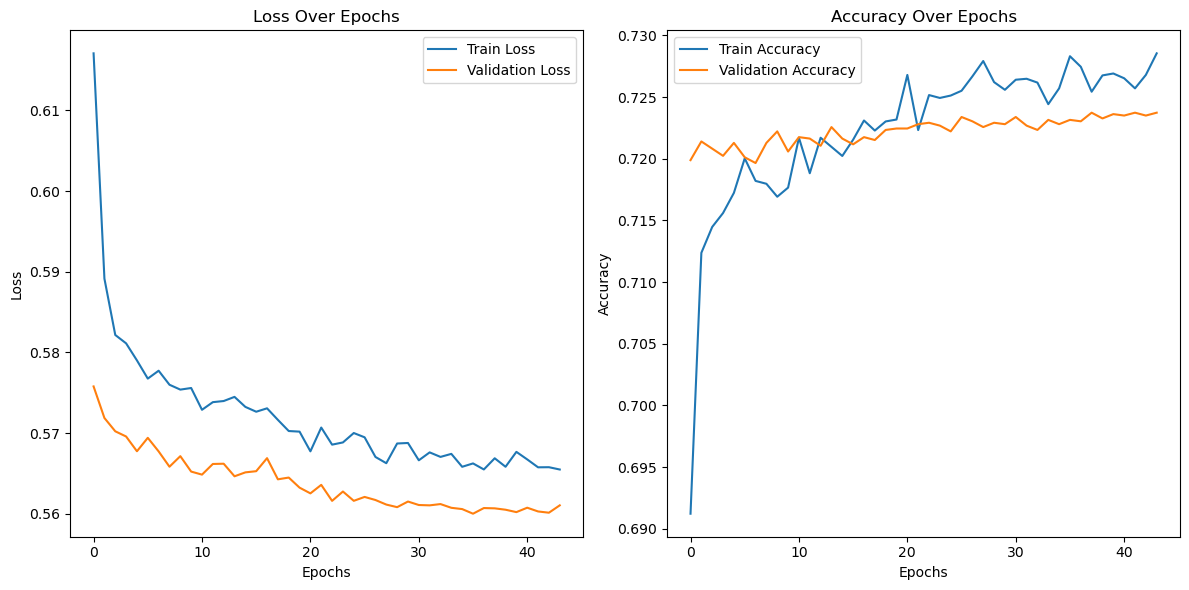

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize the training history on a curve
import matplotlib.pyplot as plt
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    

    
# plot the training loss and accuracy
plot_training_history(history)
# Save the plot as an image file
plt.savefig("training_history.png")